# Google Data Analyst Professional: 

### Case Study: Cyclist Bike Share


### The following is a case study done as part of Google's Data Analyst Professional certification. 

**Note:**  While the course does not include Python, I've decided to use it for this case study.  Some of the steps were done more for fun then for time efficiency.  The case study includes some guided steps that I diverge from slightly.  I acknowledge that there would have been faster or more efficient methods if this were a real assignment. 

Additionally, this document is reflective of the process as outlined in the course, not as a final stakeholder deliverable.

### Intro Summary: 

We work for the marketing department for a bike share company out of Chicago.  The company has three payment methods: single ride, full day passes, and annual memberships.  Annual membership holders are considered members, while all others are considered casual riders.  The companies marketing strategy has to now been based around building awareness and appealing to a large audience.  The marketing director, Moreno, believes that the future of the company resides in turning more casual riders into members and wants to focus the marketing strategy, but requires approval from the executive team.



#### We are assigned the question:

How do annual members and casual riders use Cyclistic bikes differently?
    
Following the **ask, prepare, process, analyze, share and act** data analysis process you are to deliver a report including:
- A clear statement of the business task
- A description of all data sources used
- Documentation of any cleaning or manipulation of data
- A summary of your analysis
- Supporting visualizations and key findings
- Your top three recomendations based on your analysis

# ASK

What problem are we trying to solve and how will it drive business decisions?

#### Key Stakeholders:
- Moreno, Director of Marketing and your boss, is certain the key to the company's future is turning casual riders into members.

- The executive team who will be deciding whether to move forward with the marketing program.  All we know is that they are described as 'detail-oriented'

#### Facts worth note in the case study:
- Cyclist has 5824 bicycles and 692 docking stations all in Chicago
- Cyclist offers reclinging bikes, hand tricycles and cargo bikes to aid with riders who may have dissabilities.  
 - These only make up for ~8 of riders
- 30% of cyclists ride to commute to work each day 

#### Potential Bias' to keep in mind:
- Your told that membership holders are more profitable.  It makes logical sense, but we have not seen any data to back that up.
- Moreno appears to have already decided the course of action, market towards casual riders to get more members.  They may be looking to steer the data to prove this point.
- Moreno believes that casual riders are already aware of membership offerings.

## Business task:

With the provided data what can we determine about the ways casual riders and members use Cyclistic bikes, what tendancies they share, and how do they differ.

# Prepare

Locate, Organize and Verify the Data

### Data Summary:

We are provided zip files from an Amazon S3 Cloud storage including monthly and quarterly data since the company started.

We download the last 12 months (April 2020 - April 2021) which include csv files with data on:
- ride_id
- rideable_type
- start & end times, stations and longitute/latitude
- rider status: member or casual

### Data Acquisition method:

Currently unknown

### Data Licensing:

Can be found [here](https://www.divvybikes.com/data-license-agreement)

### Data organization and verification:

These files contain 10s of thousands of rows each.  

Due to the amount of data, we will use Python via Jupyter Notebook and clean/view/merge our data with the Pandas library.  

### For this notebook, I loaded and merged all files with pandas, as described below, and then uploaded to kaggle

The merged, pre-cleaned dataset can be found here: [Divvy Cyclist Dataset](https://www.kaggle.com/michaelmcray/divvy-cyclist-04-20-to-04-21)

```
import pandas as pd
import numpy as np

#List to hold dataframes
df_list = []

for file in /file_location/csv_files:
    df_csv = pd.read_csv(file)
    df_list.append(df_csv)
    
#Ensure all 13 files were added to the list
print(len(df_list))
```

#### Use Concat to combine all files into single dataframe

`df = pd.concat(df_list, axis=0)`

## Let's get started  with our data:  

#### We'll import our libraries for analysis and load our merged csv.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../input/divvy-cyclist-04-20-to-04-21/Divvy_Cyclist.csv', low_memory=False)

## Begin Inspecting:

We'll look through our data for nulls, duplicates, poor formatting and outliers.

### Check number of rows and columns:

In [3]:
print(df.shape)

(3826978, 13)


### Check our available column names and data types

In [4]:
print(df.dtypes)


ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


**Note**:
- started_at & ended_at should be datetime columns, but are showing as object.
 - Object means the columns may have string or mixed data.  
 - We'll need to investigate further.

### Check for Null values

In [5]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    148231
start_station_id      148857
end_station_name      171416
end_station_id        171877
start_lat                  0
start_lng                  0
end_lat                 5005
end_lng                 5005
member_casual              0
dtype: int64

**Note**:
- Sizable amount of nulls in the station columns (~20%).  
- Ended up deleting after further evaluation.

### Quickview of our first 5 rows

In [6]:
print(df.head())

            ride_id rideable_type           started_at             ended_at  \
0  A847FADBBC638E45   docked_bike  2020-04-26 17:45:14  2020-04-26 18:12:03   
1  5405B80E996FF60D   docked_bike  2020-04-17 17:08:54  2020-04-17 17:17:03   
2  5DD24A79A4E006F4   docked_bike  2020-04-01 17:54:13  2020-04-01 18:08:36   
3  2A59BBDF5CDBA725   docked_bike  2020-04-07 12:50:19  2020-04-07 13:02:31   
4  27AD306C119C6158   docked_bike  2020-04-18 10:22:59  2020-04-18 11:15:54   

             start_station_name start_station_id             end_station_name  \
0                  Eckhart Park               86  Lincoln Ave & Diversey Pkwy   
1     Drake Ave & Fullerton Ave              503              Kosciuszko Park   
2          McClurg Ct & Erie St              142   Indiana Ave & Roosevelt Rd   
3  California Ave & Division St              216       Wood St & Augusta Blvd   
4          Rush St & Hubbard St              125   Sheridan Rd & Lawrence Ave   

  end_station_id  start_lat  start_lng

### Check for duplicate rows

In [7]:
df.shape

(3826978, 13)

In [8]:
duplicate_df = df[df.duplicated()]
print(duplicate_df.shape)

(0, 13)


**0 duplicated rows, great!**

### Check if ids unique or specific to rider/location

In [9]:
id_ride = df.ride_id.unique()
id_start = df.start_station_id.unique()
id_end = df.end_station_id.unique()
print(len(id_ride), len(id_start), len(id_end))

3826769 1876 1353


- id_ride = approximately 3826800;
- id_start, id_end were ~1800

#### id_ride is apparently unique while station id is tied to station name
- We'll delete the id_ride column since we're not planning to use SQL and currently don't need a unique column
- Well delete the station id's because the station names will be easier for our stakeholder's to understand

### Delete Columns

In [10]:
df = df.drop(['ride_id', 'start_station_id', 'end_station_id'], axis = 1)

### Rename Columns

In [11]:
df = df.rename(columns = {'rideable_type' : 'Bike_Type', 'started_at' : 'Start_Time', 'ended_at' : 'End_Time', 'start_station_name' : 'Starting_Station', 'end_station_name' : 'Ending_Station', 'member_casual' : 'Rider_Status', 'start_lat' : 'Starting_Latitude', 'start_lng' : 'Starting_Longitude','end_lat' : 'Ending_Latitude', 'end_lng' : 'Ending_Longitude'})
df.head()

Bike_Type           Start_Time             End_Time  \
0  docked_bike  2020-04-26 17:45:14  2020-04-26 18:12:03   
1  docked_bike  2020-04-17 17:08:54  2020-04-17 17:17:03   
2  docked_bike  2020-04-01 17:54:13  2020-04-01 18:08:36   
3  docked_bike  2020-04-07 12:50:19  2020-04-07 13:02:31   
4  docked_bike  2020-04-18 10:22:59  2020-04-18 11:15:54   

               Starting_Station               Ending_Station  \
0                  Eckhart Park  Lincoln Ave & Diversey Pkwy   
1     Drake Ave & Fullerton Ave              Kosciuszko Park   
2          McClurg Ct & Erie St   Indiana Ave & Roosevelt Rd   
3  California Ave & Division St       Wood St & Augusta Blvd   
4          Rush St & Hubbard St   Sheridan Rd & Lawrence Ave   

   Starting_Latitude  Starting_Longitude  Ending_Latitude  Ending_Longitude  \
0            41.8964            -87.6610          41.9322          -87.6586   
1            41.9244            -87.7154          41.9306          -87.7238   
2            41.8945            -87.6179          41.8679          -87.6230   
3            41.9030            -87.6975          41.8992          -87.6722   
4            41.8902            -87.6262          41.9695          -87.6547   

  Rider_Status  
0       member  
1       member  
2       member  
3       member  
4       casual

# Process Data

Determine any errors, reformat as necessary, prepare to create visualizations

### Reviewing data types

In [12]:
df.dtypes

Bike_Type              object
Start_Time             object
End_Time               object
Starting_Station       object
Ending_Station         object
Starting_Latitude     float64
Starting_Longitude    float64
Ending_Latitude       float64
Ending_Longitude      float64
Rider_Status           object
dtype: object

#### Start Time, End Time should are objects but should be datetime dtypes

In [13]:
from datetime import datetime

In [14]:
#Convert to time format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])


In [15]:
df.dtypes

Bike_Type                     object
Start_Time            datetime64[ns]
End_Time              datetime64[ns]
Starting_Station              object
Ending_Station                object
Starting_Latitude            float64
Starting_Longitude           float64
Ending_Latitude              float64
Ending_Longitude             float64
Rider_Status                  object
dtype: object

### Add some informative Columns:
- We'll start by creating a 'Ride Length' Column expressing a difference in Start and End times.  I found this a bit clunky in Pandas, but ended up with a result in decimal of hours.
- Second, we'll find the day of the week coresponding to each Start Time.


In [16]:
df['Ride_Length'] = ((df['End_Time'] - df['Start_Time']).dt.days) * 24 + ((df['End_Time'] - df['Start_Time']).dt.seconds)/ 3600

In [17]:
df['Day_of_Week'] = df['Start_Time'].dt.day_name()
print(df.head())

     Bike_Type          Start_Time            End_Time  \
0  docked_bike 2020-04-26 17:45:14 2020-04-26 18:12:03   
1  docked_bike 2020-04-17 17:08:54 2020-04-17 17:17:03   
2  docked_bike 2020-04-01 17:54:13 2020-04-01 18:08:36   
3  docked_bike 2020-04-07 12:50:19 2020-04-07 13:02:31   
4  docked_bike 2020-04-18 10:22:59 2020-04-18 11:15:54   

               Starting_Station               Ending_Station  \
0                  Eckhart Park  Lincoln Ave & Diversey Pkwy   
1     Drake Ave & Fullerton Ave              Kosciuszko Park   
2          McClurg Ct & Erie St   Indiana Ave & Roosevelt Rd   
3  California Ave & Division St       Wood St & Augusta Blvd   
4          Rush St & Hubbard St   Sheridan Rd & Lawrence Ave   

   Starting_Latitude  Starting_Longitude  Ending_Latitude  Ending_Longitude  \
0            41.8964            -87.6610          41.9322          -87.6586   
1            41.9244            -87.7154          41.9306          -87.7238   
2            41.8945         

### Investigate data to determine any additional cleaning needed

Start by creating a new dataframe with reduced columns to check our ride length calculation. Ride length times are in hours.

In [18]:
df_short = df.drop(['Start_Time', 'End_Time', 'Starting_Station', 'Ending_Station', 'Starting_Latitude', 'Ending_Latitude', 'Starting_Longitude', 'Ending_Longitude'], axis=1 )

In [19]:
df_short.groupby(['Day_of_Week', 'Rider_Status']).mean()

Ride_Length
Day_of_Week Rider_Status             
Friday      casual           0.708302
            member           0.259658
Monday      casual           0.735894
            member           0.253323
Saturday    casual           0.767708
            member           0.293934
Sunday      casual           0.831583
            member           0.300476
Thursday    casual           0.694388
            member           0.250032
Tuesday     casual           0.444750
            member          -0.198797
Wednesday   casual           0.668228
            member           0.252053

In [20]:
df_short.groupby('Rider_Status')['Rider_Status'].count()

Rider_Status
casual    1566977
member    2260001
Name: Rider_Status, dtype: int64

It looks like we might have some questionable data for ride length with some times showing negative.  Lets make a quick box plot to check outliers.


<AxesSubplot:xlabel='Ride_Length'>

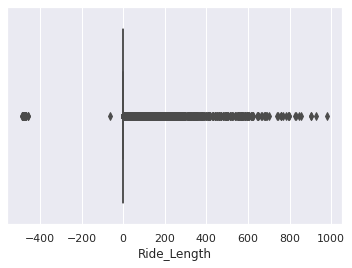

In [21]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

sns.boxplot(x=df['Ride_Length'])

In [22]:
df['Ride_Length'].describe()

count    3.826978e+06
mean     4.118581e-01
std      6.299624e+00
min     -4.841661e+02
25%      1.300000e-01
50%      2.391667e-01
75%      4.397222e-01
max      9.786672e+02
Name: Ride_Length, dtype: float64

We indeed have some negative values and an unexpectedly large standard deviation.  Well create a new dataframe and sort and remove these values.

In [23]:
df_sort = df.sort_values('Ride_Length')
df_sort.head()

Bike_Type          Start_Time            End_Time  \
3044386  electric_bike 2020-12-15 12:10:14 2020-11-25 08:00:16   
3010031  electric_bike 2020-12-15 11:35:39 2020-11-25 07:40:56   
3009188    docked_bike 2020-12-15 11:34:23 2020-11-25 08:00:15   
3071081    docked_bike 2020-12-15 12:12:43 2020-11-25 08:42:16   
3074111    docked_bike 2020-12-15 11:34:38 2020-11-25 08:09:43   

                  Starting_Station                Ending_Station  \
3044386      Wells St & Concord Ln        Clark St & Schiller St   
3010031  Sheffield Ave & Willow St     Sheffield Ave & Willow St   
3009188   Kingsbury St & Kinzie St          Canal St & Monroe St   
3071081      Dayton St & North Ave  Sheffield Ave & Kingsbury St   
3074111   Clark St & 9th St (AMLI)        Dearborn St & Adams St   

         Starting_Latitude  Starting_Longitude  Ending_Latitude  \
3044386          41.911960          -87.634798        41.907917   
3010031          41.913769          -87.652842        41.913745   
3009188          41.889176          -87.638505        41.881690   
3071081          41.910578          -87.649421        41.910522   
3074111          41.870816          -87.631246        41.879356   

         Ending_Longitude Rider_Status  Ride_Length Day_of_Week  
3044386        -87.631583       member  -484.166111     Tuesday  
3010031        -87.652846       member  -483.911944     Tuesday  
3009188        -87.639530       member  -483.568889     Tuesday  
3071081        -87.653106       member  -483.507500     Tuesday  
3074111        -87.629791       member  -483.415278     Tuesday

In [24]:
df_time_error = df[df['Ride_Length']<0]
df_time_error.count()

Bike_Type             10557
Start_Time            10557
End_Time              10557
Starting_Station      10509
Ending_Station        10472
Starting_Latitude     10557
Starting_Longitude    10557
Ending_Latitude       10531
Ending_Longitude      10531
Rider_Status          10557
Ride_Length           10557
Day_of_Week           10557
dtype: int64

**Results**: 10557 rows where End time is before start time.  Out of 3826978 rides this is less then 1/4 of a percent.  Still We'll take a quick look to see if we can find any other correlations.

In [25]:
df_time_error['Start_Time'].max()

Timestamp('2021-04-30 10:56:32')

In [26]:
df_time_error['Start_Time'].min()

Timestamp('2020-04-01 14:18:09')

In [27]:
df_time_error.groupby('Day_of_Week')['Rider_Status'].count()

Day_of_Week
Friday       1855
Monday       1051
Saturday     2006
Sunday       1547
Thursday     1138
Tuesday      1654
Wednesday    1306
Name: Rider_Status, dtype: int64

In [28]:
df_time_error.groupby('Rider_Status')['Start_Time'].count()

Rider_Status
casual    3255
member    7302
Name: Start_Time, dtype: int64

Appear to have been happening for the entire year, reasonably spread out through the days of the week.  For now, I'm going to remove this data, but definitely something I'd investigate a little further if possible. 

In [29]:
df_time_high = df[df['Ride_Length']>24]
df_time_high.count()

Bike_Type             3137
Start_Time            3137
End_Time              3137
Starting_Station      3137
Ending_Station        2293
Starting_Latitude     3137
Starting_Longitude    3137
Ending_Latitude       2312
Ending_Longitude      2312
Rider_Status          3137
Ride_Length           3137
Day_of_Week           3137
dtype: int64

Less then 0.1 % of rides last over 24 hours.  For now, we'll remove these values as well. I'll create a new dataframe with the removed rows in case I want to compare the two.

In [30]:
df_clean = df[(df['Ride_Length'] < 24) & (df['Ride_Length'] > 0)]
df.shape

(3826978, 12)

In [31]:
df_clean.shape

(3812865, 12)

In [32]:
sns.boxplot(x=df_clean['Ride_Length'])

<AxesSubplot:xlabel='Ride_Length'>

In [33]:
df_clean.groupby(['Day_of_Week', 'Rider_Status'])['Ride_Length'].mean()

Day_of_Week  Rider_Status
Friday       casual          0.566820
             member          0.254205
Monday       casual          0.591542
             member          0.246335
Saturday     casual          0.644123
             member          0.286438
Sunday       casual          0.669364
             member          0.288700
Thursday     casual          0.538427
             member          0.244476
Tuesday      casual          0.558558
             member          0.244824
Wednesday    casual          0.534666
             member          0.244752
Name: Ride_Length, dtype: float64

Now we'll check for any more nulls and remove those as well.

In [34]:
print(df_clean.isnull().sum())

Bike_Type                  0
Start_Time                 0
End_Time                   0
Starting_Station      148179
Ending_Station        170362
Starting_Latitude          0
Starting_Longitude         0
Ending_Latitude         4119
Ending_Longitude        4119
Rider_Status               0
Ride_Length                0
Day_of_Week                0
dtype: int64


In [35]:
df_clean = df_clean.dropna()

In [36]:
print(df_clean.isnull().sum())

Bike_Type             0
Start_Time            0
End_Time              0
Starting_Station      0
Ending_Station        0
Starting_Latitude     0
Starting_Longitude    0
Ending_Latitude       0
Ending_Longitude      0
Rider_Status          0
Ride_Length           0
Day_of_Week           0
dtype: int64


### Now we'll export the data to a csv and load into Tableau Public to visualize.

df_clean = df_clean.to_csv('//Divvy_Cyclist.csv', index=False)


# Analyze & Share

Our **Assignment** was 'How do annual members and casual riders use Cyclistic bikes differently?'

First lets list some questions that we can ask to determine thes differences:
- Who are taking these rides, members or casuals?
- Where are they riding?
- For how long are they riding?
- What times of the day and year are they riding?
- What type of bikes are they riding?

After loading the data into Tableau Public the following charts were developed to address these questions.

## Who is taking the rides?


#### What we found:
- There was over 3.5 million rides between April 2020 and April 2021.
- For these rides, nearly 59% were members and 41% were casuals.

#### What we don't know:
- How many of these rides were from the same individuals.  Our information is specific to the ride and not the user.

#### Considerations:
- Suprised by the high percentage of members.  I expected them to be a minority.

## Where are they riding?

The following gif shows start locations for members, casuals and combined:

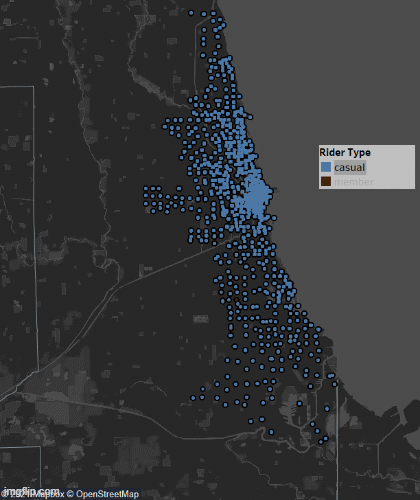

#### What we found:
- From this graphic there doesn't appear to be a large difference between members and casuals.
- A seperate graph of ending locations showed comprable results.
- Most rides appear to be clustered in the metro area.

#### What we don't know:
- The relation of ending location or duration of these trips. 
- The time of the day/year these trips were taken

#### Considerations:
- Further examinations of this based on time or specific areas may add beneficial information.

## For how long are they riding?
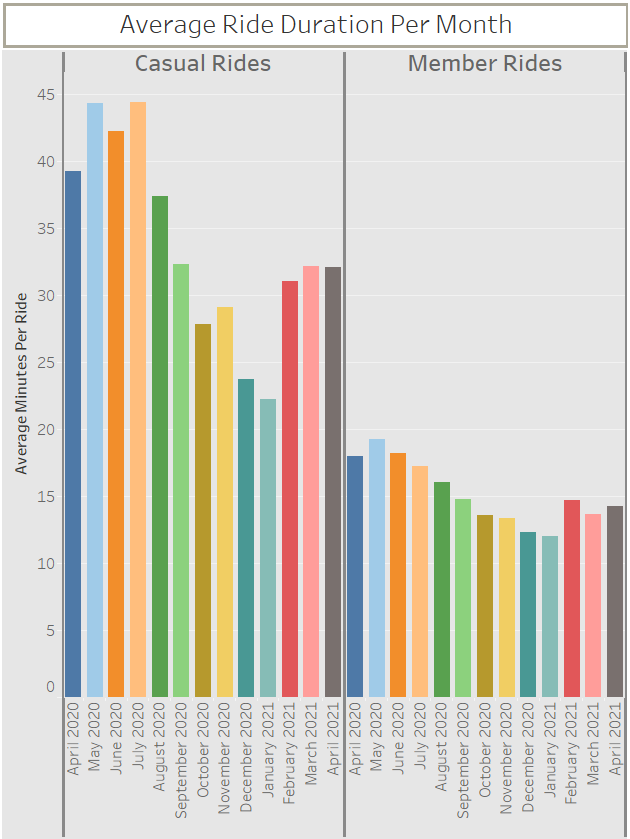
#### What we found:
- Casual rides tend to last almost twice as long as member rides.
- Shorter rides are unsurprisingly in the winter and longest in the winter.
- Members are more consistant with their ride durations with average ride duration ranging between 12-19 minutes compared to 22 and 44 for the casuals.

#### What we don't know:
- What ending and starting locations relate to these shorter and longer rides.
- How the number of unique users may relate to this data. 

#### Considerations:
- It was stated in the case study that members tended to be more likely to use the vehicles for transportation to work.  This could explain the steadier trend and lower average

## What time of day and year are they riding?

### Monthly breakdown:

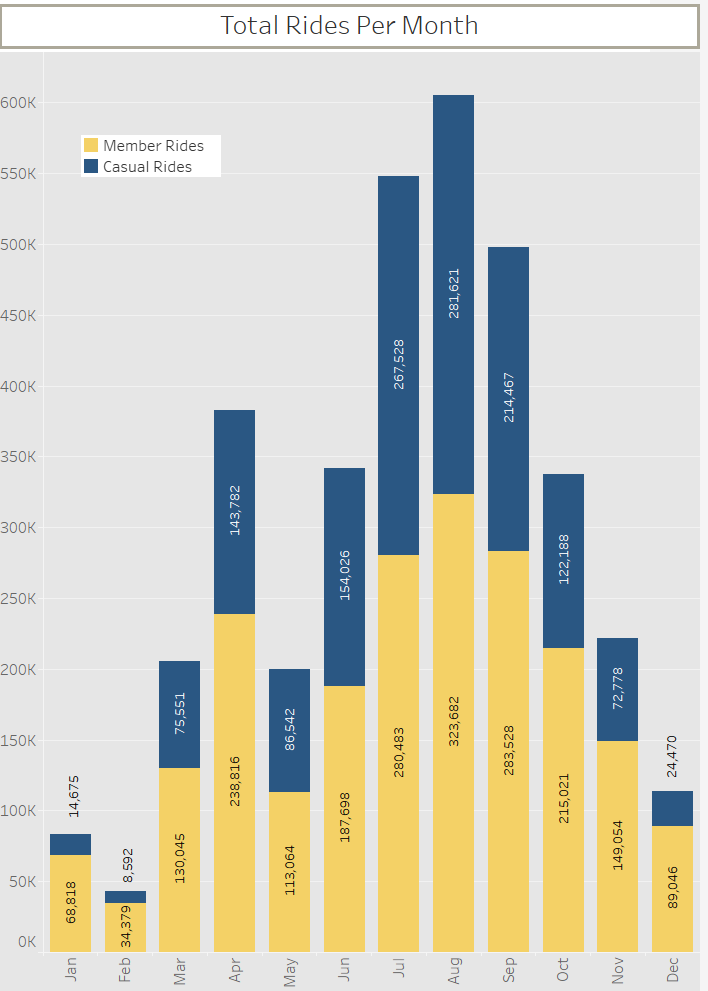

#### What we found:
- In summer months, member and casual rides are nearly equal.
- This drastically falls off between November and March with members going for over twice as many rides as casuals for those months.

#### What we don't know:
- The weather is likely a large factor here, but so may location of bikes. 

#### Considerations:
- Could something be done to spark casual interest in rides even in the colder months?


### Weekly Breakdown
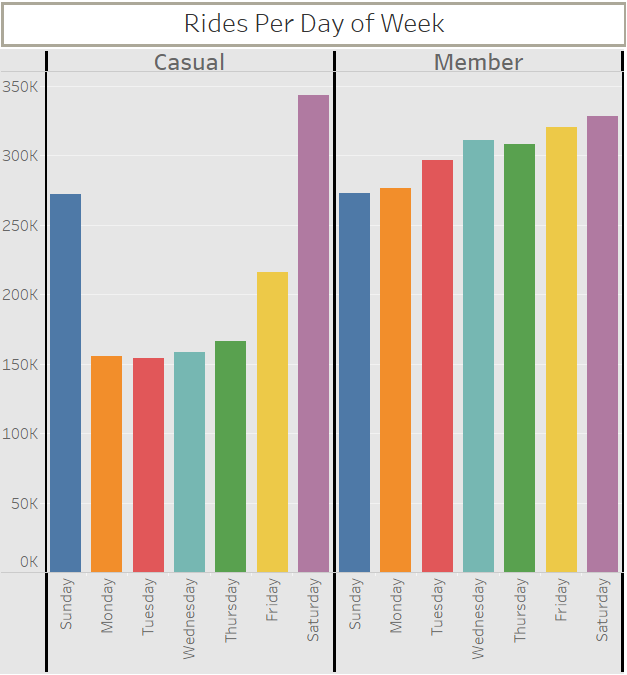
#### What we found:
- Member rides are highest on Saturday but fairly consistent.
- Casual rides are much higher in the weekend.

#### What we don't know:
- If any monthly outliers are efficting this.

#### Considerations:
- How can we leverage more Casual rides during the week or market to member riders on the weekend.

### Hourly Breakdown

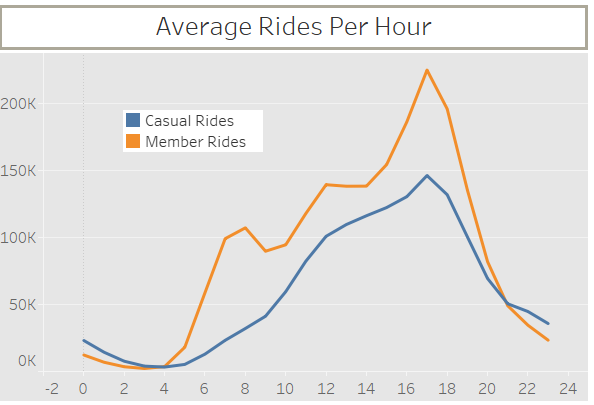

#### What we found:
- Member rides spike heavily between 6-8 AM and again between 4 and 6 PM. They also have a peak around noon (lunch)
- Casual rides begin more slowly at the start of the day but ramp up more consistently.

#### What we don't know:
- How this varies by month to month

#### Considerations:
- This is likely again do the people using the bikes for transportation to work.
- It's interesting that casual rides don't decrease as quickly in the evenings, although they do begin declining at the same time as member rides.

### What type of bikes are they riding?
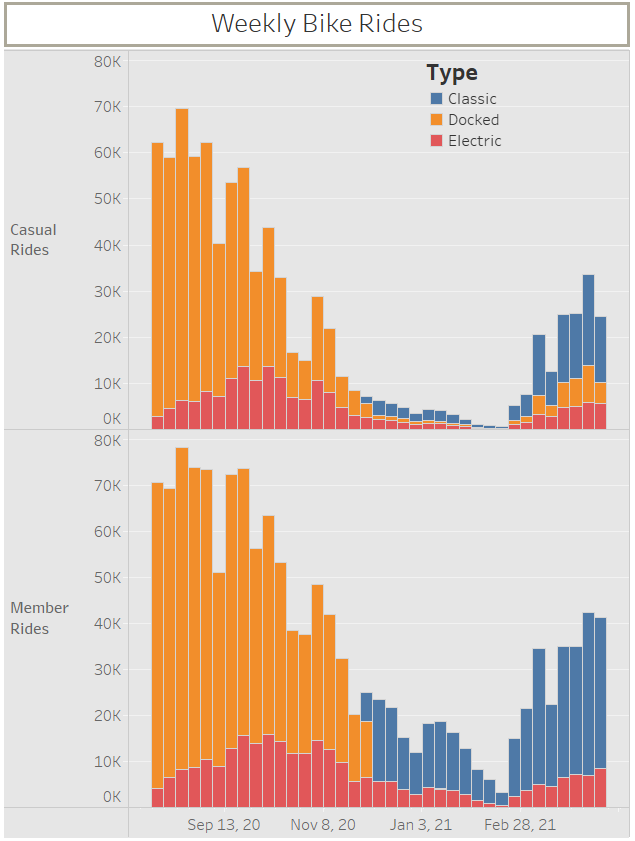
#### What we found:
- Classic bikes appear to be implemented around December 2020.
- Members appear to have taken to the classic bikes more quickly then the casual riders.
- Around the end of February casual riders became interested in the docked bikes again while the member riders stuck with the classic.

#### What we don't know:
- Really much of anything about what entails these different bike types.
- What incitive there is to ride any of these variations.

#### Considerations:
- We'd need more information on the types of bikes to make a solid recommendation but it's worth pointing out the difference in user levels especially as the difference is increasing at the time of the investigation.

# Act

## Conclusion:
**So how do annual members and casual riders use Cyclistic bikes differently**
1. Length (Duration)
- Members are more consistent riders from day to day, while casual rides last on average twice as long.  This could be doe to price structure making short trips less economic for casual rides, marketing towards leisure instead of convenience etc.
2. When (Day, Week, Month)
- Member rides spike during the normal start and of the business day, where casual rides start slower and increase/decrease at a steadier rate
- Casual riders prefer weekends, where members are more frequent on the weekdays especially around the start and end of work.  This is likely due to members being more likely to use the bikes for commutes, and casuals for leisure.
- All rides are down in the colder months, but casual riders all but dissapear then are nearly as frequent as members in the summer.
3. What (Type of Bike)
- Members adopted the classic bike faster then casual riders and now strongly prefer them where casual riders are showing a returned interest in docked bikes.
- **(Assumption)** Members are more likely to adapt to a new type of bike, but casual riders will more likely ride what is available.  
 - This is an assumption due to not knowing what accentives, bike availability, or price structures each group includees.


# Wrapping Up:  Google's Data Analysis Case Study

This concludes the case study portion of my analysis.  I enjoyed my time pouring through the data and trying to gleam some insight into what makes these ride types different.  If I was an employee of this company, I'd love to know more about the locations, the number of users of each type involved with these rides, and spend more time looking into the paths and distances of each trip.

In the next section, I'm going to experiment a little bit with running the data through some beginner Machine Learning algorithms. This is unrelated to the assigned case study, but may provide some fun insight.

# Experimenting with Machine Learning

It seems irresponsible to run this on Kaggle and not at least put the data through a machine learning algorithm. 

### Goals:
- Gain insight into how similar/different our two ride types are based on ability for ML to accurately predict. 
- Determine which variables are most important in predictions

### Note:  This is a very basic approach to ML using Random Forest Classification to see what insight can be gained on the goals listed.  Any feedback, or suggestions for other algorithms/methods are appreciated.

## First we will need to further process our data before we can begin:

Quick review of our header:

In [37]:
df.head()

Bike_Type          Start_Time            End_Time  \
0  docked_bike 2020-04-26 17:45:14 2020-04-26 18:12:03   
1  docked_bike 2020-04-17 17:08:54 2020-04-17 17:17:03   
2  docked_bike 2020-04-01 17:54:13 2020-04-01 18:08:36   
3  docked_bike 2020-04-07 12:50:19 2020-04-07 13:02:31   
4  docked_bike 2020-04-18 10:22:59 2020-04-18 11:15:54   

               Starting_Station               Ending_Station  \
0                  Eckhart Park  Lincoln Ave & Diversey Pkwy   
1     Drake Ave & Fullerton Ave              Kosciuszko Park   
2          McClurg Ct & Erie St   Indiana Ave & Roosevelt Rd   
3  California Ave & Division St       Wood St & Augusta Blvd   
4          Rush St & Hubbard St   Sheridan Rd & Lawrence Ave   

   Starting_Latitude  Starting_Longitude  Ending_Latitude  Ending_Longitude  \
0            41.8964            -87.6610          41.9322          -87.6586   
1            41.9244            -87.7154          41.9306          -87.7238   
2            41.8945            -87.6179          41.8679          -87.6230   
3            41.9030            -87.6975          41.8992          -87.6722   
4            41.8902            -87.6262          41.9695          -87.6547   

  Rider_Status  Ride_Length Day_of_Week  
0       member     0.446944      Sunday  
1       member     0.135833      Friday  
2       member     0.239722   Wednesday  
3       member     0.203333     Tuesday  
4       casual     0.881944    Saturday

**Let's break down a few of these columns and see how many unique values we have:**

In [38]:
df['Bike_Type'].value_counts()


docked_bike      2583183
electric_bike     709303
classic_bike      534492
Name: Bike_Type, dtype: int64

In [39]:
df['Starting_Station'].value_counts(),

(Streeter Dr & Grand Ave          38726
 Clark St & Elm St                35077
 Lake Shore Dr & Monroe St        33623
 Theater on the Lake              32281
 Lake Shore Dr & North Blvd       29403
                                  ...  
 Hampden Ct & Diversey Ave            1
 S Michigan Ave & E 118th St          1
 N Clark St & W Elm St                1
 N Damen Ave & W Wabansia St          1
 N Hampden Ct & W Diversey Ave        1
 Name: Starting_Station, Length: 713, dtype: int64,)

### Let's take another look at longitude and latitude

In [40]:
df['Starting_Longitude'].describe()

count    3.826978e+06
mean    -8.764493e+01
std      2.585165e-02
min     -8.787000e+01
25%     -8.765891e+01
50%     -8.764170e+01
75%     -8.762773e+01
max     -8.752000e+01
Name: Starting_Longitude, dtype: float64

In [41]:
df['Starting_Latitude'].describe()

count    3.826978e+06
mean     4.190394e+01
std      4.385214e-02
min      4.164000e+01
25%      4.188224e+01
50%      4.190000e+01
75%      4.193000e+01
max      4.208000e+01
Name: Starting_Latitude, dtype: float64

**There might be enough variance in latitude to take a closer look.  We might be able to scale it to something useful, but for now we'll remove it for simplicity**

### Reducing our variables:
- Both the start station name and ID have too many distinct values to categorize for this.  If I knew more about the area, maybe we could break them into sections of the town, but for now we'll remove.
- We'll continue to use Start Time and remove End Time
- ride_id is a unique column
- Latitude and Longitude data

In [42]:
#Cleaning up our columns:

dfML = df.drop(['Starting_Station', 'Ending_Station', 'End_Time', 'Starting_Latitude', 'Ending_Latitude', 'Starting_Longitude', 'Ending_Longitude'], axis='columns')
dfML.head()


Bike_Type          Start_Time Rider_Status  Ride_Length Day_of_Week
0  docked_bike 2020-04-26 17:45:14       member     0.446944      Sunday
1  docked_bike 2020-04-17 17:08:54       member     0.135833      Friday
2  docked_bike 2020-04-01 17:54:13       member     0.239722   Wednesday
3  docked_bike 2020-04-07 12:50:19       member     0.203333     Tuesday
4  docked_bike 2020-04-18 10:22:59       casual     0.881944    Saturday

**Lets move ahead and clean up our ride length data by getting minutes (multiple x 60) and setting to integer.**

In [43]:
dfML['Ride_Length'] = dfML['Ride_Length'] * 60

In [44]:
dfML['Ride_Length'] = dfML['Ride_Length'].astype(int)

In [45]:
dfML.head()

Bike_Type          Start_Time Rider_Status  Ride_Length Day_of_Week
0  docked_bike 2020-04-26 17:45:14       member           26      Sunday
1  docked_bike 2020-04-17 17:08:54       member            8      Friday
2  docked_bike 2020-04-01 17:54:13       member           14   Wednesday
3  docked_bike 2020-04-07 12:50:19       member           12     Tuesday
4  docked_bike 2020-04-18 10:22:59       casual           52    Saturday

### From our earlier analysis we accessed the key difference in ride types were ride length(duration) , ride time(hour of day, day of week, month of year), and to a lesser extend bike type   

**Let's break these down a bit so they can be categories**

#### From our Rider per Month chart their seems to be two distinct areas: Colder months (October-March) and Warmer months (April-September)

In [46]:
#Break datetime into integer value for Month
dfML['Month'] = dfML['Start_Time'].dt.month

In [47]:
dfML.Month.value_counts()

8     622361
7     551480
9     532958
4     422006
10    388653
6     343005
11    259716
3     228496
5     200274
12    131573
1      96834
2      49622
Name: Month, dtype: int64

**The following will let us split our monthly time into warm/cold**

In [48]:
dfML['Season'] = pd.cut(dfML['Month'],
                            [0,3,9,12],
                            labels = ['Cold', 'Warm', 'Cold'],
                             include_lowest=True,
                            ordered=False)

### Let's seperate our 'Day of Week' column based on weekday or weekend
- In our chart we can see the count of casual rides drops much lower then members during weekdays

In [49]:
dfML['Part_of_Week'] = np.where((dfML['Day_of_Week'] == 'Saturday') | (dfML['Day_of_Week'] == 'Sunday'), 1,0)

In [50]:
dfML.head()

Bike_Type          Start_Time Rider_Status  Ride_Length Day_of_Week  \
0  docked_bike 2020-04-26 17:45:14       member           26      Sunday   
1  docked_bike 2020-04-17 17:08:54       member            8      Friday   
2  docked_bike 2020-04-01 17:54:13       member           14   Wednesday   
3  docked_bike 2020-04-07 12:50:19       member           12     Tuesday   
4  docked_bike 2020-04-18 10:22:59       casual           52    Saturday   

   Month Season  Part_of_Week  
0      4   Warm             1  
1      4   Warm             0  
2      4   Warm             0  
3      4   Warm             0  
4      4   Warm             1

### Now we'll seperate our daily time into hours

**In our analysis we determined members had large spikes in rides during morning and evening commutes.  These maybe beneficial for our model to predict**
- The following will let us split our hourly time into parts of the day

In [51]:
#Break datetime into integer value for hour
dfML['Hours'] = dfML['Start_Time'].dt.hour

**The following will let us split our hourly time into parts of the day**

In [52]:
dfML['Part_of_Day'] = pd.cut(dfML['Hours'],
                            [0,4,8,16,20,23],
                            labels = ['Late_Night', 'Morning', 'Afternoon','Evening', 'Night'],
                             include_lowest=True,
                            ordered=False)
                                                         

In [53]:
dfML.Part_of_Day.value_counts()

Afternoon     1947128
Evening       1154841
Morning        377115
Night          257986
Late_Night      89908
Name: Part_of_Day, dtype: int64

In [54]:
dfML.head()

Bike_Type          Start_Time Rider_Status  Ride_Length Day_of_Week  \
0  docked_bike 2020-04-26 17:45:14       member           26      Sunday   
1  docked_bike 2020-04-17 17:08:54       member            8      Friday   
2  docked_bike 2020-04-01 17:54:13       member           14   Wednesday   
3  docked_bike 2020-04-07 12:50:19       member           12     Tuesday   
4  docked_bike 2020-04-18 10:22:59       casual           52    Saturday   

   Month Season  Part_of_Week  Hours Part_of_Day  
0      4   Warm             1     17     Evening  
1      4   Warm             0     17     Evening  
2      4   Warm             0     17     Evening  
3      4   Warm             0     12   Afternoon  
4      4   Warm             1     10   Afternoon

### Seperate our Rider Status into member = 1, casual = 0

In [55]:
dfML['Ride_Type'] = np.where(dfML['Rider_Status'] == 'member',1,0)

## Now we'll break our categorical data into numerical form using One-Hot Encoding via pandas get_dummies.  

### We'll do this for our 'Rider Status', 'Bike Type', 'Season' and 'Part_of_Day' columns

[Here]('https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970') is a simple guide on One hot encoding.

I could likely do this by changing the labels of the columns we cut, but I'm going to experiment with this method first

In [56]:
bt_dummies = pd.get_dummies(dfML['Bike_Type'])

In [57]:
seasons_dummies = pd.get_dummies(dfML['Season'])

In [58]:
pod_dummies = pd.get_dummies(dfML['Part_of_Day'])

## Time to add all our dummy frames into our dataFrame

**Note: Also remove redundant columns**

In [59]:
dfML = pd.concat([dfML, bt_dummies, seasons_dummies, pod_dummies], axis=1)

In [60]:
dfML = dfML.drop(columns = ['Part_of_Day', 'Day_of_Week', 'Season','Start_Time', 'Bike_Type', 'Rider_Status'])

In [61]:
dfML.head()

Ride_Length  Month  Part_of_Week  Hours  Ride_Type  classic_bike  \
0           26      4             1     17          1             0   
1            8      4             0     17          1             0   
2           14      4             0     17          1             0   
3           12      4             0     12          1             0   
4           52      4             1     10          0             0   

   docked_bike  electric_bike  Cold  Warm  Late_Night  Morning  Afternoon  \
0            1              0     0     1           0        0          0   
1            1              0     0     1           0        0          0   
2            1              0     0     1           0        0          0   
3            1              0     0     1           0        0          1   
4            1              0     0     1           0        0          1   

   Evening  Night  
0        1      0  
1        1      0  
2        1      0  
3        0      0  
4        0      0

In [62]:
dfML.isna().sum()

Ride_Length      0
Month            0
Part_of_Week     0
Hours            0
Ride_Type        0
classic_bike     0
docked_bike      0
electric_bike    0
Cold             0
Warm             0
Late_Night       0
Morning          0
Afternoon        0
Evening          0
Night            0
dtype: int64

# Import sklearn and split our data into training and testing data

In [63]:
from sklearn.model_selection import train_test_split
y = dfML['Ride_Type']
X = dfML.drop(['Ride_Type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [64]:
#checking training data 
y_train.value_counts()

1    1581804
0    1097080
Name: Ride_Type, dtype: int64

In [65]:
X_train.value_counts()

Ride_Length  Month  Part_of_Week  Hours  classic_bike  docked_bike  electric_bike  Cold  Warm  Late_Night  Morning  Afternoon  Evening  Night
9            8      0             17     0             1            0              0     1     0           0        0          1        0        1199
8            8      0             17     0             1            0              0     1     0           0        0          1        0        1195
7            8      0             17     0             1            0              0     1     0           0        0          1        0        1189
6            9      0             17     0             1            0              0     1     0           0        0          1        0        1182
10           7      0             17     0             1            0              0     1     0           0        0          1        0        1162
                                                                                                            

In [66]:
#checking test data
X_test.value_counts()

Ride_Length  Month  Part_of_Week  Hours  classic_bike  docked_bike  electric_bike  Cold  Warm  Late_Night  Morning  Afternoon  Evening  Night
8            7      0             17     0             1            0              0     1     0           0        0          1        0        536
6            8      0             17     0             1            0              0     1     0           0        0          1        0        518
10           7      0             17     0             1            0              0     1     0           0        0          1        0        517
7            8      0             17     0             1            0              0     1     0           0        0          1        0        510
10           8      0             17     0             1            0              0     1     0           0        0          1        0        491
                                                                                                                 

In [67]:
y_test.value_counts()

1    678197
0    469897
Name: Ride_Type, dtype: int64

In [68]:
#Lets double check we have no relevant nulls
X_test.isna().sum()

Ride_Length      0
Month            0
Part_of_Week     0
Hours            0
classic_bike     0
docked_bike      0
electric_bike    0
Cold             0
Warm             0
Late_Night       0
Morning          0
Afternoon        0
Evening          0
Night            0
dtype: int64

# Import RandomForestClassifier for our algorithm:

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Train our RFC model

In [70]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 20)
rf_train = clf.fit(X_train,y_train)

In [71]:
y_pred = clf.predict(X_test)

In [72]:
clf.predict_proba(X)[0:5]

array([[0.45709474, 0.54290526],
       [0.19788977, 0.80211023],
       [0.35506704, 0.64493296],
       [0.36947992, 0.63052008],
       [1.        , 0.        ]])

In [73]:
importance = list(zip(X, clf.feature_importances_))
importance

[('Ride_Length', 0.6733347744944037),
 ('Month', 0.0654166281142715),
 ('Part_of_Week', 0.05342894672902805),
 ('Hours', 0.06801943641071342),
 ('classic_bike', 0.026492726552043436),
 ('docked_bike', 0.012112092267005012),
 ('electric_bike', 0.011659263618594361),
 ('Cold', 0.014132124832772078),
 ('Warm', 0.013154817151559589),
 ('Late_Night', 0.01128665717785748),
 ('Morning', 0.0365490041672361),
 ('Afternoon', 0.003334780461241571),
 ('Evening', 0.0021878261646862073),
 ('Night', 0.008890921858587563)]

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.44      0.54    469897
           1       0.69      0.86      0.76    678197

    accuracy                           0.69   1148094
   macro avg       0.68      0.65      0.65   1148094
weighted avg       0.69      0.69      0.67   1148094



In [75]:
accuracy = (metrics.accuracy_score(y_test, y_pred)) * 100
accuracy

68.66171236849944

### Observations:
- Not surprised Ride Length is the highest importance since this data showed the greatest deviation, but surprised it seems the only relevant variable.
- Expected more signifigance from some of the grouped time and season categories.  The way I have these split may need to be reassesed.


## Let's try with fewer variables
- We'll keep Ride Length, but focus on the time variables
- The 'Part of Day' variables may need some adjusting or maybe its just adding too many variables.

In [76]:
dfML_time = dfML[['Ride_Type','Ride_Length', 'Month', 'Hours', 'Part_of_Week']].copy()

In [77]:
yt = dfML_time['Ride_Type']
Xt = dfML_time.drop(['Ride_Type'], axis=1)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt,yt, test_size=0.3, random_state=30)

In [78]:
clft = RandomForestClassifier(n_estimators = 100, random_state = 20)
rft_train = clft.fit(Xt_train,yt_train)

In [79]:
yt_pred = clft.predict(Xt_test)

In [80]:
clft.predict_proba(Xt)[0:5]

array([[0.48166336, 0.51833664],
       [0.28709264, 0.71290736],
       [0.36676468, 0.63323532],
       [0.33000772, 0.66999228],
       [0.9383646 , 0.0616354 ]])

In [81]:
impt = list(zip(Xt, clft.feature_importances_))
impt

[('Ride_Length', 0.7218291982659595),
 ('Month', 0.07563257972515527),
 ('Hours', 0.1391489743159738),
 ('Part_of_Week', 0.06338924769291152)]

In [82]:
print(classification_report(yt_test, yt_pred))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53    469897
           1       0.69      0.86      0.76    678197

    accuracy                           0.68   1148094
   macro avg       0.68      0.65      0.65   1148094
weighted avg       0.68      0.68      0.67   1148094



In [83]:
acct = (metrics.accuracy_score(yt_test, yt_pred)) * 100
acct

68.42897881183944

#### Observations

- Nearly identical accuracy with ride length now nearly 75% of the importance
- Hours measuring as high in importance as months and part of week combined.

## Just  Ride lenght and cold/warm months

In [84]:
dfML_temp = dfML[['Ride_Type','Ride_Length', 'Cold', 'Warm']].copy()

In [85]:
ytp = dfML_temp['Ride_Type']
Xtp = dfML_temp.drop(['Ride_Type'], axis=1)
Xtp_train, Xtp_test, ytp_train, ytp_test = train_test_split(Xtp,ytp, test_size=0.3, random_state=30)

clftp = RandomForestClassifier(n_estimators = 100, random_state = 20)
rftp_train = clftp.fit(Xtp_train,ytp_train)

ytp_pred = clftp.predict(Xtp_test)

In [86]:
clftp.predict_proba(Xtp)[0:5]

array([[0.50481852, 0.49518148],
       [0.31781154, 0.68218846],
       [0.41004452, 0.58995548],
       [0.386148  , 0.613852  ],
       [0.81206786, 0.18793214]])

In [87]:
print(classification_report(ytp_test, ytp_pred))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45    469897
           1       0.66      0.90      0.76    678197

    accuracy                           0.67   1148094
   macro avg       0.68      0.62      0.61   1148094
weighted avg       0.68      0.67      0.64   1148094



In [88]:
imptp = list(zip(Xtp, clftp.feature_importances_))
imptp

[('Ride_Length', 0.9283397550420682),
 ('Cold', 0.03840316053387288),
 ('Warm', 0.033257084424058746)]

In [89]:
acctp = (metrics.accuracy_score(ytp_test, ytp_pred)) * 100
acctp

67.0123700672593

#### Observation:
- Only slightly lower scores
- Ride Length now taking up over 92% of the importance

## Just the times of day by our grouped categories

In [90]:
dfML_PoD = dfML[['Ride_Type','Late_Night', 'Morning', 'Afternoon', 'Evening', 'Night']].copy()

In [91]:
yp = dfML_PoD['Ride_Type']
Xp = dfML_PoD.drop(['Ride_Type'], axis=1)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,yp, test_size=0.3, random_state=30)

clfp = RandomForestClassifier(n_estimators = 100, random_state = 20)
rfp_train = clfp.fit(Xp_train,yp_train)

yp_pred = clfp.predict(Xp_test)

In [92]:
clfp.predict_proba(Xp)[0:5]

array([[0.41139843, 0.58860157],
       [0.41139843, 0.58860157],
       [0.41139843, 0.58860157],
       [0.41835812, 0.58164188],
       [0.41835812, 0.58164188]])

In [93]:
print(classification_report(yp_test, yp_pred))

              precision    recall  f1-score   support

           0       0.57      0.13      0.21    469897
           1       0.61      0.93      0.74    678197

    accuracy                           0.60   1148094
   macro avg       0.59      0.53      0.47   1148094
weighted avg       0.59      0.60      0.52   1148094



In [94]:
imp = list(zip(Xp, clfp.feature_importances_))
imp

[('Late_Night', 0.15738931964263508),
 ('Morning', 0.529727781560397),
 ('Afternoon', 0.07381159030429209),
 ('Evening', 0.07737579254046621),
 ('Night', 0.16169551595220968)]

In [95]:
accp = (metrics.accuracy_score(yp_test, yp_pred))* 100
accp

60.3247643485638

#### Observation
- Much lower accuracy ~8% and poor F1 score without Ride Length included
- Importance score for morning now reflective of the difference we saw in our analysis

## Just the best performers:

In [96]:
dfML_Best = dfML[['Ride_Type','Ride_Length', 'Morning', 'Hours', 'docked_bike']].copy()

In [97]:
yb = dfML_Best['Ride_Type']
Xb = dfML_Best.drop(['Ride_Type'], axis=1)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb,yb, test_size=0.3, random_state=30)

clfb = RandomForestClassifier(n_estimators = 100, random_state = 20)
rfb_train = clfb.fit(Xb_train,yb_train)

yb_pred = clfb.predict(Xb_test)

In [98]:
clfb.predict_proba(Xb)[0:5]

array([[0.4839786 , 0.5160214 ],
       [0.28049451, 0.71950549],
       [0.39331349, 0.60668651],
       [0.38165781, 0.61834219],
       [0.76750227, 0.23249773]])

In [99]:
print(classification_report(yb_test, yb_pred))

              precision    recall  f1-score   support

           0       0.70      0.39      0.50    469897
           1       0.68      0.88      0.77    678197

    accuracy                           0.68   1148094
   macro avg       0.69      0.64      0.63   1148094
weighted avg       0.68      0.68      0.66   1148094



In [100]:
impb = list(zip(Xb, clfb.feature_importances_))
impb

[('Ride_Length', 0.8243837434194785),
 ('Morning', 0.06240566371097246),
 ('Hours', 0.0885023400386055),
 ('docked_bike', 0.02470825283094355)]

In [101]:
accb= (metrics.accuracy_score(yb_test, yb_pred)) * 100
accb

68.03920236496315

#### Observation
- Only slightly worse performance then with all our variables, 0.8% accuracy
- Once again, heavily weighted on Ride Length

# Final thoughts

- Ride Length comes out the heavy winner in most important variable when trying to determine if a ride was casual or a member 
- Business accumen on this industry and the city of Chicago, along with further user data could help with our assessment
- Much more time could be spent trying different algorithms, adjusting our variables and hypertuneing

# Final Note:

To anyone tha makes it this far, thanks for reading.  I'd appreciate any feedback.  Many of these steps could have been simplified, but I've enjoyed experimenting in different areas.

### To do:
- Code and Text clean up
- Consistent formatting
- Create a data cleaning summary
